In [11]:
import pickle
import pandas as pd
from pathlib import Path
import numpy as np
import bz2

In [2]:
with bz2.open('data/doc_lbe.pkl.bz2', 'rb') as f:
    doc_lbe = pickle.load(f)
with bz2.open('data/card_lbe.pkl.bz2', 'rb') as f:
    card_lbe = pickle.load(f) 
with bz2.open('data/09_prepared.pkl.bz2', 'rb') as f:
    df = pickle.load(f)

In [3]:
df["id_card_int"] = card_lbe["id_card_int"]
df["id_doc_int"] = doc_lbe["id_doc_int"]
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855.0,1283228.0
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307.0,8873113.0
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220.0,12712899.0
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497.0,21535283.0
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358.0,642341.0


### Keep only online customers
Because we are detecting spam customers we should only track online ones

In [4]:
mask = df['id_order']!=0
df = df[mask]

### Receipts Total amount

In [21]:
order_sum = df.groupby(["id_order"])["sum"].sum()
order_sum.describe(percentiles = list(np.arange(0 , 1.1 , 0.1)) + [0.05 , 0.95])

count    503504.000000
mean       1349.496831
std        1128.310615
min           0.000000
0%            0.000000
5%          243.000000
10%         346.000000
20%         515.000000
30%         675.000000
40%         850.762000
50%        1040.980000
60%        1271.540000
70%        1566.150000
80%        1982.588000
90%        2720.830000
95%        3488.028500
100%      48005.000000
max       48005.000000
Name: sum, dtype: float64

<AxesSubplot:>

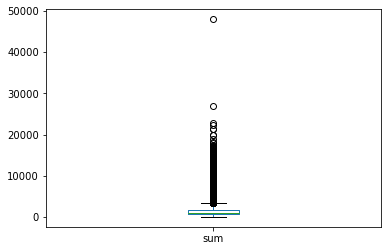

In [18]:
order_sum.plot.box()

### Potential weird behavior
Let's check both tails of this distribution as potential suspects

We have a minimum of 0 and maximum of 48000

We can notice the weird jump in the amount on the right tale

In [26]:
q05 = order_sum.quantile(0.05)
q95 = order_sum.quantile(0.95)
left_tail = order_sum[order_sum <= q05]
right_tail = order_sum[order_sum >= q95]

### Investigate left tail

In [27]:
left_tail.sort_values()

id_order
6539725      0.0
6280102      0.0
6049447      0.0
6539109      0.0
6487278      0.0
           ...  
6254198    243.0
5580640    243.0
6309946    243.0
5877421    243.0
6390207    243.0
Name: sum, Length: 25177, dtype: float64

### Check orders with 0 total sum

In [28]:
df[df['id_order'] == 6539725]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
36669095,2020-09-27 19:34:33,EF2E252F-E000-EB11-B444-005056A7539A,6539725,7613488,1295,311,1.0,0.0,False,NaN,NaN
36670659,2020-09-27 19:34:33,EF2E252F-E000-EB11-B444-005056A7539A,6539725,7613488,36226,357,4.0,0.0,False,NaN,NaN


In [32]:
df[df['id_card'] == '7613488']

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
11903182,2020-09-09 14:04:42,DD7AE525-8DF2-EA11-B444-005056A7539A,5844893,7613488,34172,17954,1.0,120.0,False,NaN,6019944.0
18246001,2020-09-14 20:39:23,B0E4C3F1-B2F6-EA11-B444-005056A7539A,6050177,7613488,20316,13200,1.0,0.0,False,NaN,22947432.0
18246379,2020-09-14 20:39:23,B0E4C3F1-B2F6-EA11-B444-005056A7539A,6050177,7613488,23973,12315,1.0,0.0,False,NaN,13193765.0
36669095,2020-09-27 19:34:33,EF2E252F-E000-EB11-B444-005056A7539A,6539725,7613488,1295,311,1.0,0.0,False,NaN,NaN
36670659,2020-09-27 19:34:33,EF2E252F-E000-EB11-B444-005056A7539A,6539725,7613488,36226,357,4.0,0.0,False,NaN,NaN


In [29]:
df[df['id_order'] == 6280102]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
26694531,2020-09-20 20:29:22,FE04CF24-67FB-EA11-B444-005056A7539A,6280102,7613477,16223,12775,1.0,0.0,False,NaN,NaN
26695016,2020-09-20 20:29:22,FE04CF24-67FB-EA11-B444-005056A7539A,6280102,7613477,21086,14003,2.0,0.0,False,NaN,NaN


In [33]:
df[df['id_card'] == '7613477']

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
1787702,2020-09-02 11:09:36,D90F9C1E-F4EC-EA11-B444-005056A7539A,5599713,7613477,27474,12387,2.000,156.00,False,171005.0,11541195.0
6252693,2020-09-05 10:29:54,FD1B32D1-49EF-EA11-B444-005056A7539A,5690376,7613477,848,369,2.000,306.00,False,NaN,3038523.0
11903138,2020-09-09 12:37:23,2830BF56-80F2-EA11-B444-005056A7539A,5839960,7613477,32986,12970,1.000,160.00,False,NaN,16727718.0
11903181,2020-09-09 12:37:23,2830BF56-80F2-EA11-B444-005056A7539A,5839960,7613477,34172,17954,1.000,151.00,False,NaN,10181488.0
11903316,2020-09-09 12:37:23,2830BF56-80F2-EA11-B444-005056A7539A,5839960,7613477,37867,13538,1.000,188.00,False,NaN,6507704.0
18245303,2020-09-14 20:38:43,2D7EF115-B2F6-EA11-B444-005056A7539A,6048358,7613477,1067,12572,0.864,21.00,False,NaN,9116513.0
26694531,2020-09-20 20:29:22,FE04CF24-67FB-EA11-B444-005056A7539A,6280102,7613477,16223,12775,1.000,0.00,False,NaN,NaN
26695016,2020-09-20 20:29:22,FE04CF24-67FB-EA11-B444-005056A7539A,6280102,7613477,21086,14003,2.000,0.00,False,NaN,NaN
27891959,2020-09-21 20:34:17,5B80A3FD-31FC-EA11-B444-005056A7539A,6319081,7613477,605,19230,0.736,21.34,False,NaN,NaN
30884008,2020-09-23 12:39:03,C965BF54-81FD-EA11-B444-005056A7539A,6369084,7613477,27474,12387,1.000,78.00,False,NaN,NaN


### Outcome
We can notice in both candidates investigationm, they bought the same category before and they have been charged in the first few times. So it looks like a discount

### Right tail investigation

In [34]:
right_tail.sort_values(ascending = False)

id_order
6518049    48005.00
5846282    26956.31
6415926    22825.48
5414142    22440.00
5656434    21437.04
             ...   
5434411     3488.34
4718793     3488.31
5961335     3488.13
5840959     3488.03
5595010     3488.03
Name: sum, Length: 25176, dtype: float64

In [35]:
df[df['id_order'] == 6518049]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
38058645,2020-09-28 08:36:51,9B6A36BF-4C01-EB11-B444-005056A7539A,6518049,A634010,647,13567,1.0,5.0,False,NaN,NaN
38060133,2020-09-28 08:36:51,9B6A36BF-4C01-EB11-B444-005056A7539A,6518049,A634010,21379,15189,4.0,9600.0,False,NaN,NaN
38060134,2020-09-28 08:36:51,9B6A36BF-4C01-EB11-B444-005056A7539A,6518049,A634010,21379,18018,16.0,38400.0,False,NaN,NaN


In [36]:
df[df['id_card'] == 'A634010']

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
38058645,2020-09-28 08:36:51,9B6A36BF-4C01-EB11-B444-005056A7539A,6518049,A634010,647,13567,1.0,5.0,False,NaN,NaN
38060133,2020-09-28 08:36:51,9B6A36BF-4C01-EB11-B444-005056A7539A,6518049,A634010,21379,15189,4.0,9600.0,False,NaN,NaN
38060134,2020-09-28 08:36:51,9B6A36BF-4C01-EB11-B444-005056A7539A,6518049,A634010,21379,18018,16.0,38400.0,False,NaN,NaN


<AxesSubplot:>

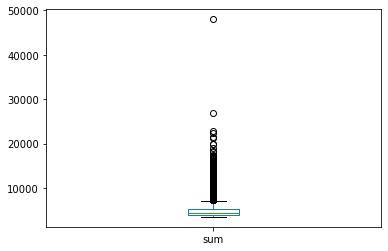

In [37]:
right_tail.plot.box()

### Criteria
From what it seems like, bots order huge quantities within 1 order, let's remove them

In [73]:
bots = set()
orders_info = {}
ks = right_tail.index.to_list()

for id_order in ks:
    suspect_order = df[df.id_order==id_order]
    candidate = suspect_order.id_card.iloc[0]
    prev = df[df.id_card == candidate].groupby(["id_order"])["sum"].sum()
    if prev.shape[0] == 1:
        bots.add(candidate)

for x in bots:
    print(x)

5164576
4296323
a574088
A679514
1335838
4067214
B006753
3746990
c450004
5837708
3921112
4759962
5802771
6551259
0884107
9672656
6839517
a672021
6034709
a615973
4531723
5711033
9158746
7567769
9865008
3813924
C403344
7775530
0477242
6025157
4468627
1240384
8565450
3927199
7849530
6632070
a699161
6784927
0674776
0219883
5885807
3978861
0569526
5336922
3082343
3285905
7434542
A634010
4419494
2241267
C426234
5508081
8915968
7798100
4743895
3712231
4952931
a604404
7168683
2863936
2451998
a702553
6804003
9165556
0371435
a589684
A615973
7381210
9265726
a762114
2251919
c461875
0804547
C400460
6968467
A665960
a557406
a861067
4879050
4963306
5014556
6319407
3180009
3771784
C519553
a213803
1830436
9653383
c447624
C475432
a689162
a678880
5118657
c514335
a251814
4551339
1421301
2648523
2908302
1759324
c493613
1117761
c486228
8161055
4260442
2756447
1584122
c169641
4800615
0796435
c498062
A251814
0527647
8423037
3836157
0757744
A689463
9510442
6725741
A388970
0208942
0957798
c444148
3861427
6138205
